# Comparaisons des algo (nr,cd,scd)

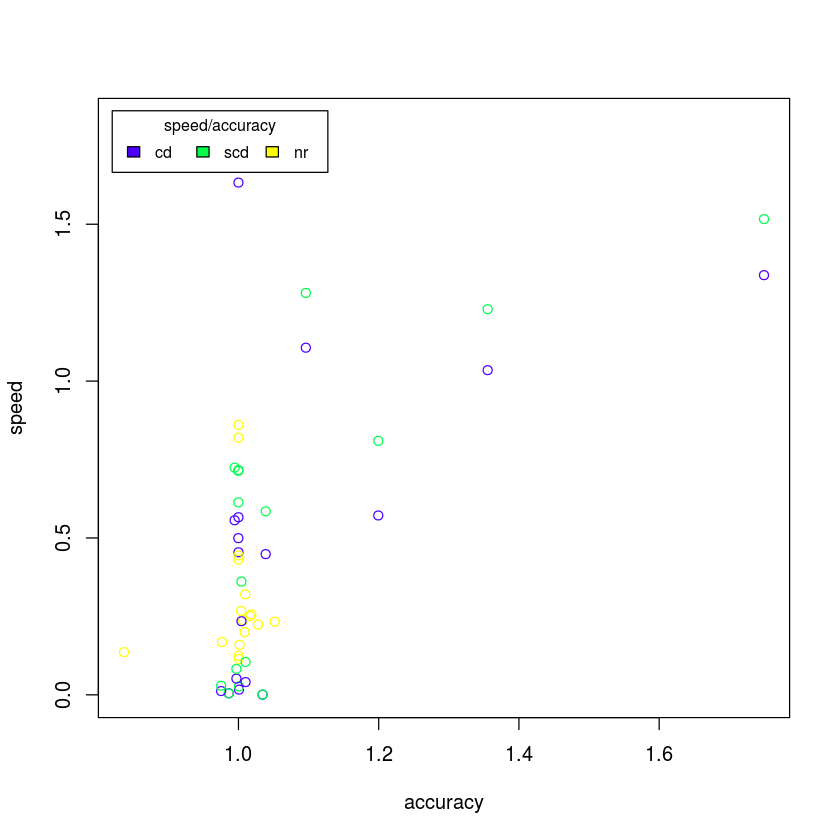

In [1]:
algorithms <- read.csv("algorithms.csv",sep = ",",h=T)
speed <- algorithms$speed
accuracy <- algorithms$accuracy
plot(accuracy,speed,col =topo.colors(3))
legend("topleft", inset=.02, title="speed/accuracy",c("cd","scd","nr"), fill=topo.colors(3), horiz=TRUE, cex=0.8,)

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (Inf) in boxplot 1 is not drawn”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (Inf) in boxplot 2 is not drawn”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (Inf) in boxplot 3 is not drawn”

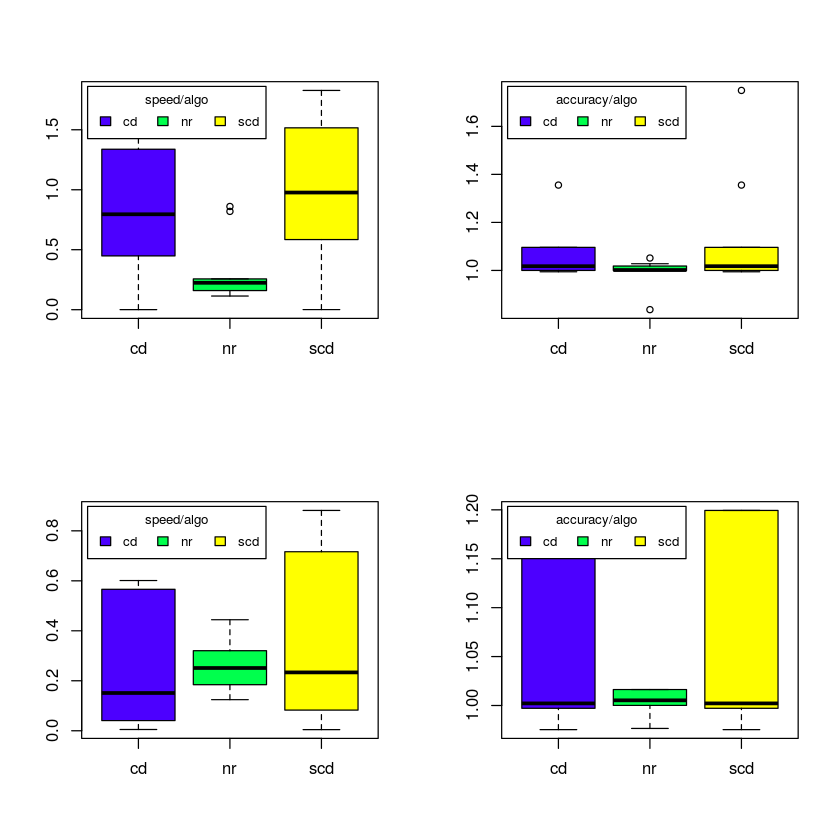

In [2]:

#####efficacity des algo pour une simulation et une dimension donnée##########

par(mfrow = c(2,2))
dim <- algorithms$dimension
# speed mieu si >1
k = 5
dat <- algorithms[(which (dim == k)),]
plot(dat$algorithm,dat$speed,col =topo.colors(3))
legend("topleft", inset=.02, title="speed/algo",c("cd","nr","scd"),
       fill=topo.colors(3), horiz=TRUE, cex=0.8)
plot(dat$algorithm,dat$accuracy,col =topo.colors(3))
legend("topleft", inset=.02, title="accuracy/algo",c("cd","nr","scd"),
       fill=topo.colors(3), horiz=TRUE, cex=0.8)

k1 = 10
dat1 <- algorithms[(which (dim == k1)),]
plot(dat1$algorithm,dat1$speed,col =topo.colors(3))
legend("topleft", inset=.02, title="speed/algo",c("cd","nr","scd"),
       fill=topo.colors(3), horiz=TRUE, cex=0.8)

plot(dat1$algorithm,dat1$accuracy,col =topo.colors(3))
legend("topleft", inset=.02, title="accuracy/algo",c("cd","nr","scd"),
       fill=topo.colors(3), horiz=TRUE, cex=0.8)


# Traitement de paths

In [3]:
paths <- read.csv("paths.csv",sep = ",",h=T)
id = paths$identifier
d = dim(paths)[1]
i = sample(1:d,1)
alg = paths[(which (id == id[i])),] # meme dimension


In [4]:
lin = alg[alg$path == 'linear',]
TPR = lin$TP/(lin$TP + lin$FN)
FPR = lin$FP/(lin$TN + lin$FP)

empir = alg[alg$path == 'empirical',]
TPR1 = empir$TP/(empir$TP + empir$FN)
FPR1 = empir$FP/(empir$TN + empir$FP)

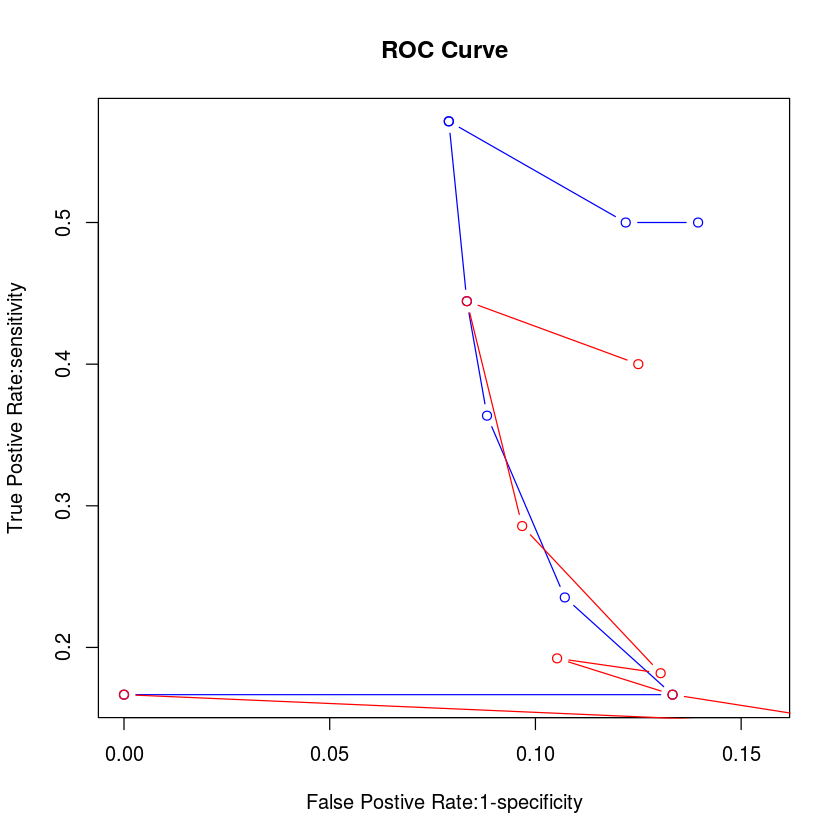

In [5]:


plot( FPR,TPR, type = "b",main = "ROC Curve", xlab = "False Postive Rate:1-specificity", 
      ylab = "True Postive Rate:sensitivity",col="blue")
lines( FPR1,TPR1, type = "b",main = "ROC Curve", xlab = "False Postive Rate:1-specificity", 
      ylab = "True Postive Rate:sensitivity",col="red")

legend(0.5, 0.3, legend=c("lamda lineaire: ", "lamda = empirical"),col = c("blue","red"), lty=1:2, cex=0.8)


In [8]:
# Air sous la courbe
AUC_lin <- sum(diff(FPR) * (TPR[-1] + TPR[-length(TPR)]))/2  
AUC_emp <- sum(diff(FPR1) * (TPR1[-1] + TPR1[-length(TPR1)]))/2  
AUC_emp/AUC_lin

[1] NaN

In [28]:
(TPR[-10]+TPR[-1])/2

[1]       NaN 0.5000000 0.5357143 0.5714286 0.5079365 0.4040404 0.2994652
[8] 0.2009804 0.1666667

# Traitement de  criteria

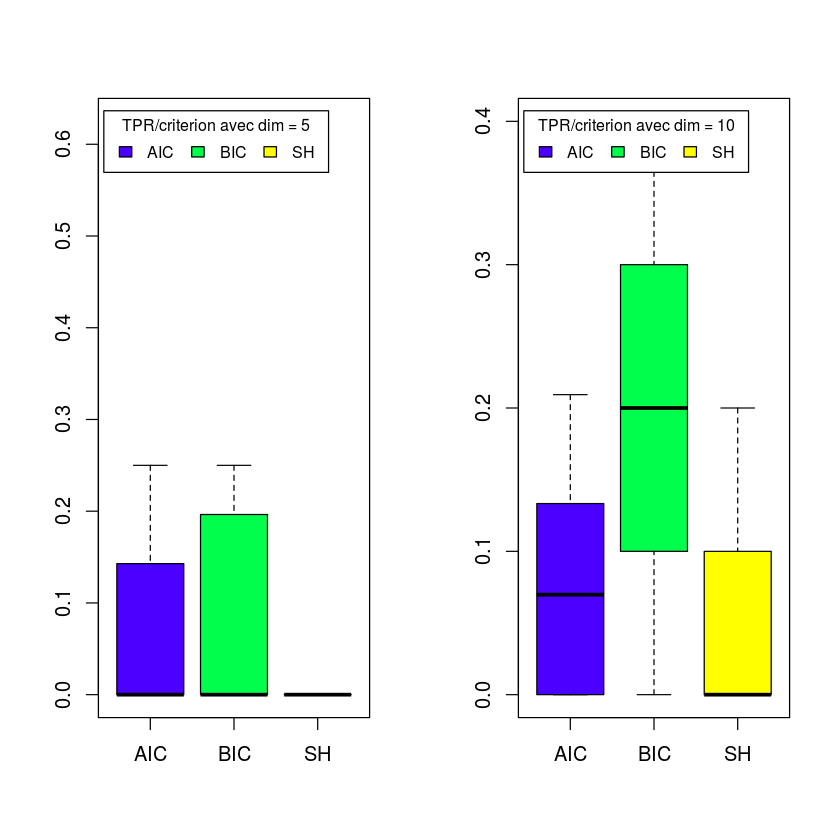

In [7]:
criteria <- read.csv("criteria.csv",sep = ",",h=T)
#donnees avec dimension 5
crit = criteria[(criteria$dimension==5),]
tpr = crit$TP/(crit$TP+crit$FN)
fpr = crit$FP/(crit$FP+crit$TN)

#donnees avec dimension 10
crit1 = criteria[(criteria$dimension==10),]
tpr1 = crit1$TP/(crit1$TP+crit1$FN)
fpr1 = crit1$FP/(crit1$FP+crit1$TN)

# critere en  fonction tpr de chaque donnee 
par(mfrow=c(1,2))
plot(crit$criterion,tpr,col =topo.colors(3))
legend("topleft", inset=.02, title="TPR/criterion avec dim = 5",
       c("AIC","BIC","SH"),fill=topo.colors(3),horiz=TRUE, cex=0.8)
      
plot(crit1$criterion,tpr1,col =topo.colors(3))
legend("topleft", inset=.02, title="TPR/criterion avec dim = 10",
       c("AIC","BIC","SH"),fill=topo.colors(3),horiz=TRUE, cex=0.8)